In [2]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 

In [18]:
data_set= pd.read_csv(r'C:\Users\Vinod\Desktop\major project\stocks\amazon_stocks.csv')  
data_set.dropna(axis='columns')

data_set.fillna(0, inplace=True)
data_set

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Volume,Trend,Close_10,Future Trend,Total score
0,0,0,20141231,311.549988,312.980011,310.010010,310.350006,2048000,-1,286.950012,-1,-231
1,1,1,20150102,312.579987,314.750000,306.959992,308.519989,2783200,-1,290.739990,-1,31
2,2,2,20150105,307.010010,308.380005,300.850006,302.190002,2774200,-1,289.440002,-1,35
3,3,3,20150106,302.239990,303.000000,292.380005,295.290008,3519000,-1,297.250000,1,35
4,4,4,20150107,297.500000,301.279999,295.329987,298.420013,2640300,1,310.320007,1,157
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1158,1158,20190808,1806.000000,1834.260010,1798.109985,1832.890015,3701200,1,1749.620000,-1,192
1159,1159,1159,20190809,1828.949951,1831.089966,1802.219971,1807.579956,2879800,-1,1768.870000,-1,452
1160,1160,1160,20190812,1795.989990,1800.979980,1777.000000,1784.920044,2905500,-1,1761.830000,-1,602
1161,1161,1161,20190813,1783.000000,1831.739990,1780.000000,1824.339966,3994000,1,1764.250000,-1,411


In [19]:
feature_df = data_set[['Trend','Total score']]


x = np.asarray(feature_df)

y = np.asarray(data_set['Future Trend'])


Text(0, 0.5, 'Stock value and sentiments')

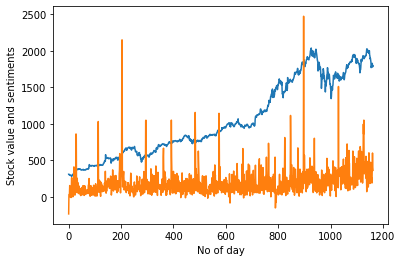

In [20]:
mtp.plot(data_set['Unnamed: 0'],data_set['Open'],data_set['Total score'])
mtp.xlabel("No of day")
mtp.ylabel("Stock value and sentiments")

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [7]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [9]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[33, 56],
       [49, 95]], dtype=int64)

In [10]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5493562231759657
